In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Intellipaat Class\CaseStudy\weather_data.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.shape

(1462, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [7]:
df.drop(['meantemp', 'wind_speed', 'meanpressure'], axis=1, inplace=True)

In [8]:
df.sample(10)

,date,humidity
1259,2016-06-13,43.312500
1244,2016-05-29,57.062500
1454,2016-12-25,94.300000
870,2015-05-21,24.625000
1441,2016-12-12,63.863636
756,2015-01-27,74.250000
1424,2016-11-25,30.550000
221,2013-08-10,79.857143
643,2014-10-06,56.750000
1436,2016-12-07,74.350000


In [9]:
df.date = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1462 non-null   datetime64[ns]
 1   humidity  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [11]:
df.sort_values(['date'], ascending=True, inplace=True)

In [12]:
df

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333
...,...,...
1457,2016-12-28,68.043478
1458,2016-12-29,87.857143
1459,2016-12-30,89.666667
1460,2016-12-31,87.000000


In [13]:
df.set_index(['date'], inplace=True)

In [14]:
df.sample(10)

,humidity
date,
2014-02-18,60.125000
2014-12-30,70.625000
2013-11-21,66.250000
2015-03-31,64.875000
2016-06-30,60.200000
2013-05-15,33.000000
2014-01-10,85.375000
2014-08-31,86.125000
2016-10-11,51.148148


In [15]:
df.tail()

,humidity
date,
2016-12-28,68.043478
2016-12-29,87.857143
2016-12-30,89.666667
2016-12-31,87.000000
2017-01-01,100.000000


<AxesSubplot:xlabel='date'>

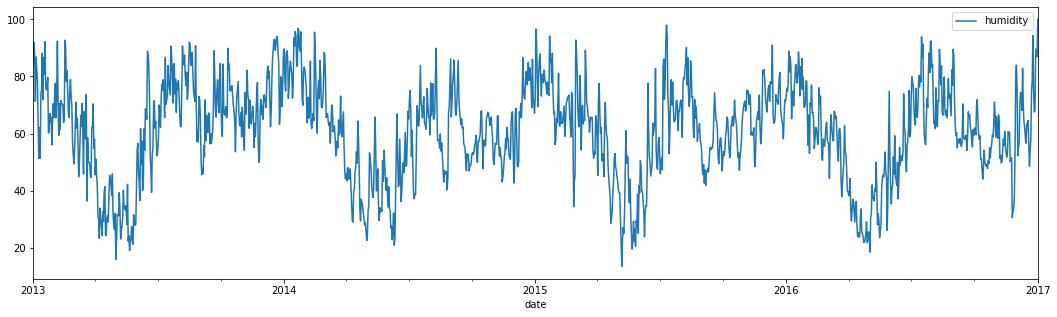

In [16]:
df.plot(figsize=(18,5))

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)

print(f'ADF statistic , {result[0]}')
print(f'P-Value={result[1]}')
print(f'n_lags={result[2]}')

if (result[1]>0.05):
    print('The Series is not stationary')
    
else:
    print('The series is stationary')

ADF statistic , -3.675576919163343
P-Value=0.004470100478130702
n_lags=15
The series is stationary


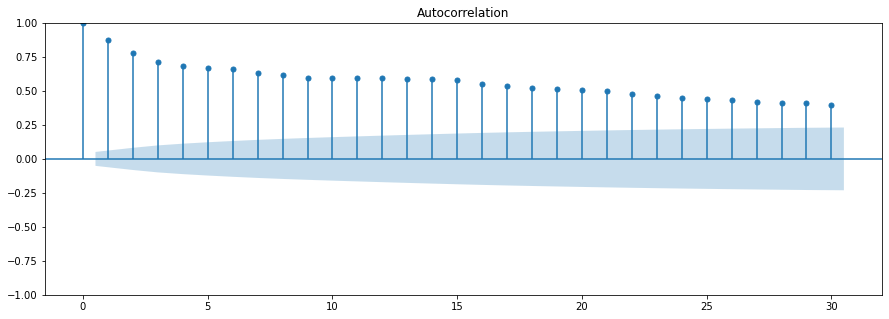

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(15,5))

plot_acf(df['humidity'], ax=ax, lags=30)

plt.show()

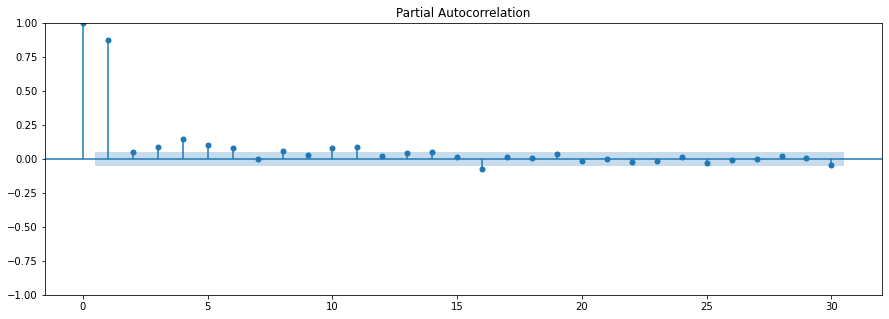

In [19]:
fig, ax = plt.subplots(figsize=(15,5))

plot_pacf(df['humidity'], ax=ax, lags=30)

plt.show()

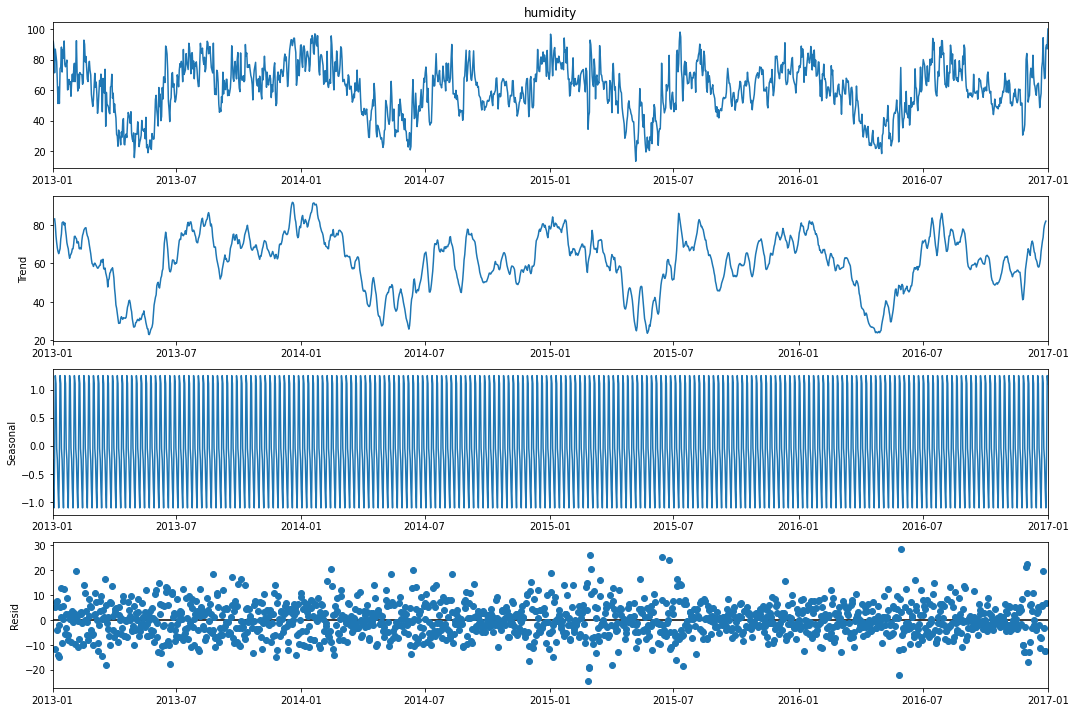

In [20]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
decomposition = sm.tsa.seasonal_decompose(df['humidity'], model='additive')
fig = decomposition.plot()
plt.show()

In [21]:
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimise_sarima(endog, order_list):
    
    results=[]
    
    for order in tqdm(order_list, desc="Fitting SARIMA models"):
        try:
            # Fit the SARIMA model with the given order
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        except:
            # If the model fails to fit, continue to the next order combination
            continue

        # Calculate the AIC (Akaike Information Criterion)
        aic = model.aic
        results.append([order, aic])

    # Create a DataFrame with the results
    result_df = pd.DataFrame(results, columns=['(p, d, q)', 'AIC'])

    # Sort the DataFrame in ascending order based on AIC values
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [22]:
from itertools import product

ps = range(0,8)
d = 1
qs  = range(0,8)

parameters = product(ps,qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    
    each = list(each)
    
    each.insert(1, d)
    
    each = tuple(each)
    
    order_list.append(each)
    
order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [23]:
result_df = optimise_sarima(df['humidity'], order_list)
result_df

Fitting SARIMA models:   0%|          | 0/64 [00:00<?, ?it/s]C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
Fitting SARIMA models:   3%|▎         | 2/64 [00:00<00:03, 17.73it/s]C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\

,"(p, d, q)",AIC
0,"(5, 1, 5)",10159.331448
1,"(1, 1, 5)",10161.147716
2,"(3, 1, 7)",10161.294825
3,"(4, 1, 5)",10161.323441
4,"(1, 1, 3)",10161.663623
...,...,...
59,"(3, 1, 0)",10226.622290
60,"(2, 1, 0)",10272.848525
61,"(0, 1, 1)",10290.639890
62,"(1, 1, 0)",10299.070225


In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['humidity'], order = (5,1,5))

result = model.fit()

result.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                 1462
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -5068.666
Date:                Thu, 20 Jul 2023   AIC                          10159.331
Time:                        23:11:24   BIC                          10217.487
Sample:                    01-01-2013   HQIC                         10181.025
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6058      0.096     -6.304      0.000      -0.794      -0.417
ar.L2         -0.2071      0.080     -2.587      0.010      -0.364      -0.050
ar.L3         -0.6428      0.057    -11.227      0.000      -0.755      -0.531
ar.L4         -0.0773      0.074     -1.044      0.296      -0.222       0.068
ar.L5          0.4398      0.077      5.732      0.000       0.289       0.590
ma.L1          0.3867      0.090      4.285      0.000       0.210       0.564
ma.L2         -0.1115      0.075     -1.495      0.135      -0.258       0.035
ma.L3          0.3404      0.058      5.882      0.000       0.227       0.454
ma.L4         -0.2619      0.062     -4.218      0.000      -0.384      -0.140
ma.L5         -0.7006      0.079     -8.831      0.000      -0.856      -0.545
sigma2        60.2835      1.787     33.738      0.000      56.781      63.786
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               178.69
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

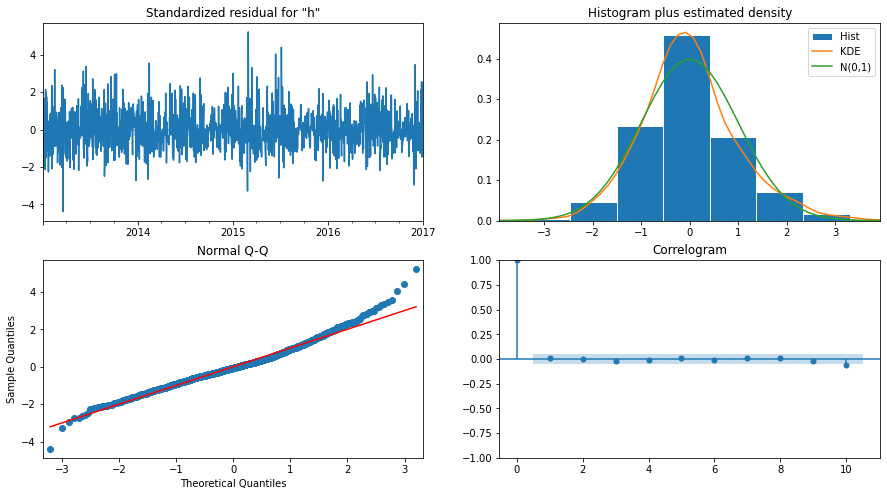

In [25]:
result.plot_diagnostics(figsize=(15, 8))
plt.show()

In [26]:
df['prediction_Arima'] = result.predict(start=1, end = 1462)

<AxesSubplot:xlabel='date'>

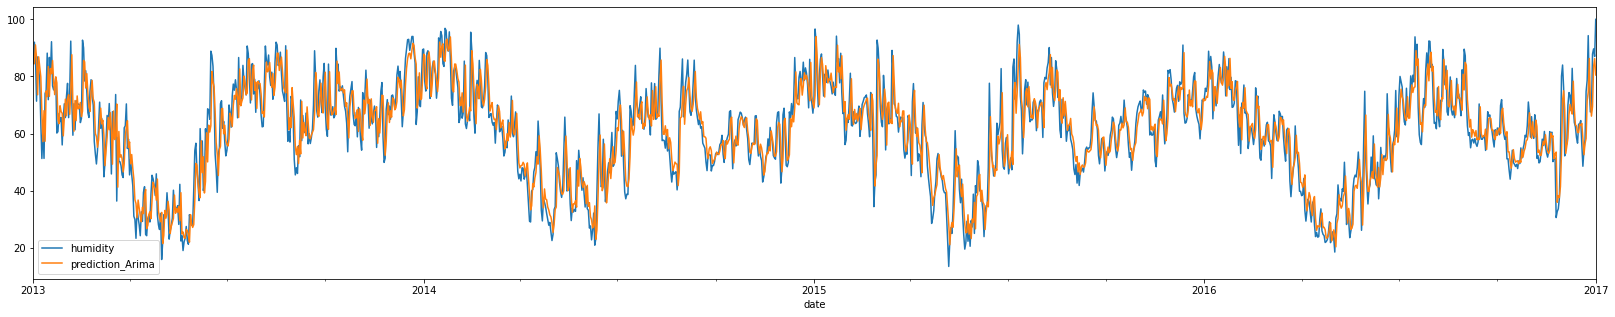

In [27]:
df[['humidity', 'prediction_Arima']].plot(figsize=(28,5))

In [28]:
forecast = result.forecast(15, alpha=0.05)

for i in forecast:
    print(round(i,0))

94.0
89.0
88.0
86.0
83.0
83.0
83.0
84.0
83.0
82.0
82.0
83.0
84.0
83.0
82.0


<AxesSubplot:>

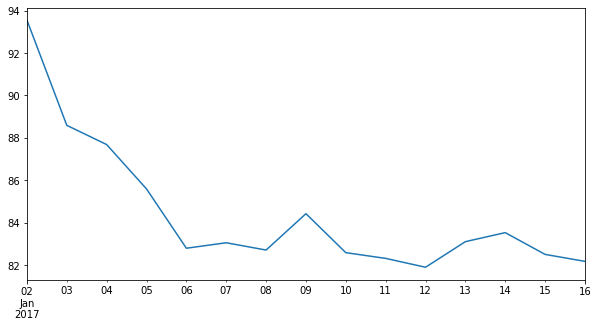

In [29]:
forecast.plot(figsize=(10,5))

In [30]:
fu_forecast = result.get_forecast(steps=15)

fu_forecast_values = fu_forecast.predicted_mean
fu_forecast_confidence = fu_forecast.conf_int()

start_date = '2017-01-01'
end_date = pd.date_range(start = start_date, periods = len(fu_forecast_values), freq='D')



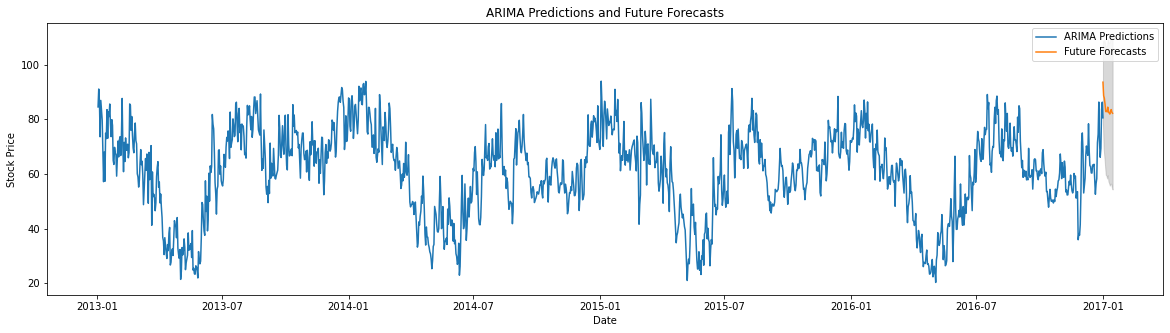

In [31]:
# Plot the ARIMA predictions and future forecasts
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['prediction_Arima'], label='ARIMA Predictions')
plt.plot(end_date, fu_forecast_values, label='Future Forecasts')
plt.fill_between(end_date, fu_forecast_confidence.iloc[:, 0], fu_forecast_confidence.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Predictions and Future Forecasts')
plt.legend()
plt.show()

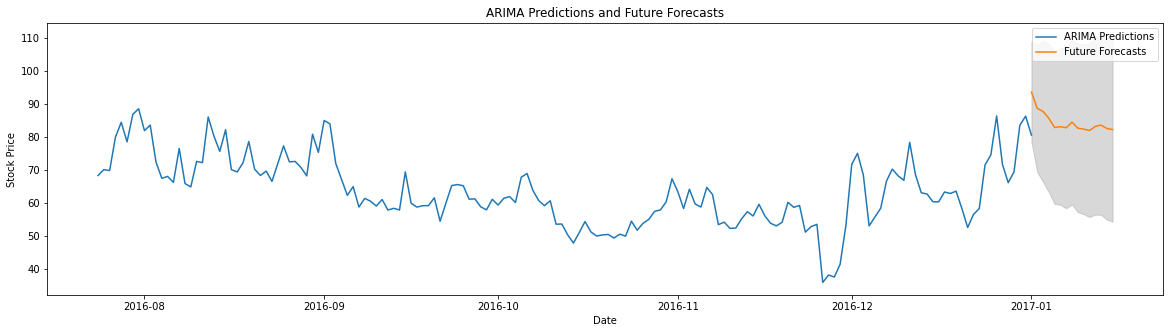

In [32]:
# Plot the ARIMA predictions and future forecasts
plt.figure(figsize=(20, 5))
plt.plot(df.index[1300:], df['prediction_Arima'][1300:], label='ARIMA Predictions')
plt.plot(end_date, fu_forecast_values, label='Future Forecasts')
plt.fill_between(end_date, fu_forecast_confidence.iloc[:, 0], fu_forecast_confidence.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Predictions and Future Forecasts')
plt.legend()
plt.show()

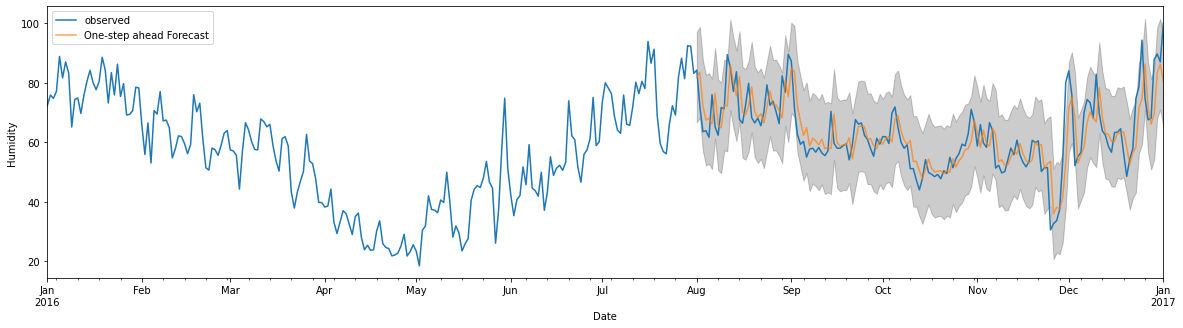

In [62]:
pred = result.get_prediction(start=pd.to_datetime('2016-08-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['humidity']['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
plt.show()

In [50]:
y_forecasted = pred.predicted_mean
y_truth = df['humidity']['2013-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 52.76


In [51]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 7.26


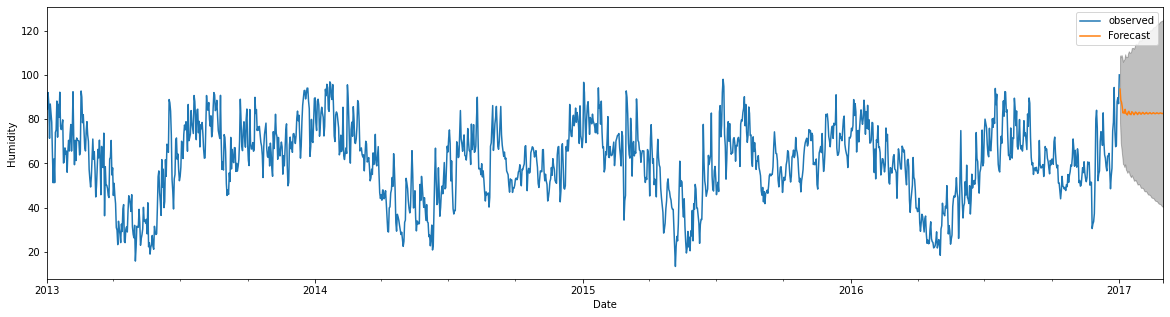

In [69]:
pred_uc = result.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = df['humidity'].plot(label='observed', figsize=(20, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
plt.show()

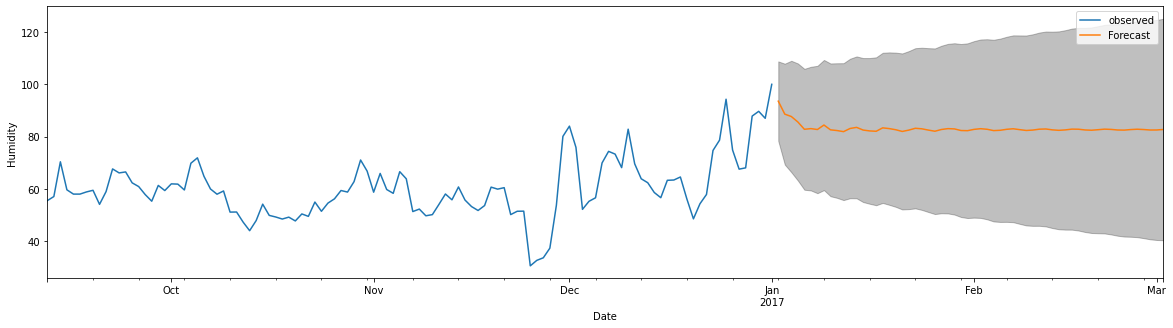

In [70]:
pred_uc = result.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = df['humidity'][1350:].plot(label='observed', figsize=(20, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
plt.show()